In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
loans_income = pd.read_csv('../../data/loans_income.csv', squeeze=True)

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data'
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5'
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20'
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20], axis=0)
results

,income,type
23719,142000.00,Data
34321,30000.00,Data
13473,81000.00,Data
2841,53724.00,Data
26983,80000.00,Data
...,...,...
995,65534.00,Mean of 20
996,65508.85,Mean of 20
997,68228.90,Mean of 20
998,55810.00,Mean of 20


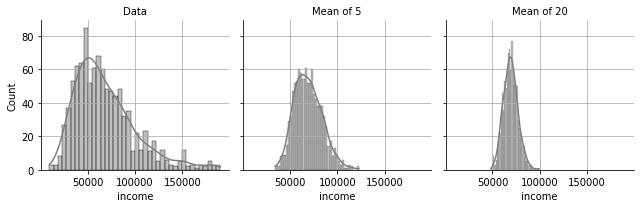

In [82]:
# 평균과 같은 표본통계량의 분포는 데이터 자체의 분포보다 규칙적이고 종 모양일 가능성이 높다. 또한 표본이 클수록 표본통계량의 분포가 좁아진다.
# => 중심극한정리
def hist(x, **kwargs):
    ax = sns.histplot(x, **kwargs)
    ax.grid()

g = sns.FacetGrid(results, col='type', col_wrap=3)
g.map(hist, 'income', color='gray',kde=True, bins=40)
g.set_axis_labels('income','Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()